Social Networks SS21

# Home Assignment 2



### General Instructions

Submit your solution via Moodle until 23.59pm on Wednesday, June 2nd.
Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of 2-4 members.
Please denote all members of the team with their student ID and full name in the notebook.
Please submit only one notebook per team.
Only submit a notebook, do not submit the datasets you used or image files that you have created - these have to be created from your notebook.
Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment.
In case of plagiarism (copying solutions from other teams or from the internet), ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically.
Think of it as this notebook being executed once.
Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Make sure to restrict yourself to using packages that are automatically installed along with anaconda, plus some additional packages that have been introduced in context of this class. An overview of packages that may be used in this assignment can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that can not be matched will not be graded.
* Whenever there is a written task, e.g. task 1b), enter your answer in the specified markdown cell. Do NOT remove or edit the label (e.g. '__A1b):__' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `nx.read_edgelist("example.edgelist")` instead of `nx.read_edgelist("C:/User/Path/to/your/Homework/example.edgelist")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points. Run your notebook from top to bottom, make sure there is no error!
  Minimize usage of global variables. Do not reuse variable names multiple times!
* Ensure your code/notebook terminates in reasonable time.
* Textual answers must always be backed by code and may not refer to results that are not part of
  your submission.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the list)
team_members = [
    {
        'first_name': 'Alice',
        'last_name': 'Foo',
        'student_id': 12345
    },
    {
        'first_name': 'Bob',
        'last_name': 'Bar',
        'student_id': 54321
    },
    {
        'first_name': 'J',
        'last_name': 'Doe',
        'student_id': 90000
    }
]

In [2]:
# general immports may go here!
import networkx as nx
import numpy as np
import math
from typing import List, Optional, Tuple, Dict
import random
import collections
from matplotlib import pyplot as plt

### Task 1: Attacking the Train Bombing Network (22 pts)

We revisit the train bombing network from home assignment 1. This time, our focus lies on attacking the network.

Name: 
Type: Graph
Number of nodes: 64
Number of edges: 243
Average degree:   7.5938


/Users/sunwen/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


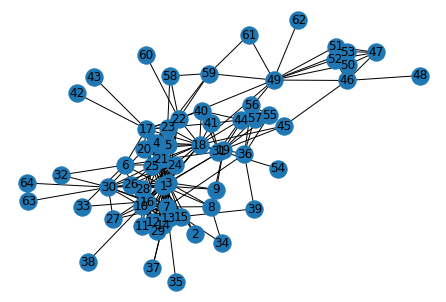

In [3]:
G = nx.read_weighted_edgelist("train.edgelist", comments='%')
print(nx.info(G))

nx.draw(G, with_labels=True) 
plt.show() 

#### a) Analyzing the Degree Distribution (2 pts)

Plot the degree distribution of the network and save it into a file **"train_degree.png"**. Do not remove the lines of your code which create and save your .png file. Argue whether or not it follows a power-law distribution!

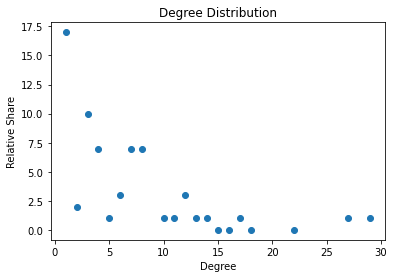

In [49]:
import collections
from matplotlib import pyplot as plt
degrees = list(dict(nx.degree(G)).values())

hist = np.histogram(degrees, bins = len(set(degrees)))[0]
d = np.unique(degrees)

plt.scatter(d, hist, marker='o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Relative Share")
plt.show()
plt.savefig("train_degree.png")


**A1a):** It is a power law distribution. The curve with a long-tailed linear plot, taht means it is a power law degree distribution.

#### b) Attacking Nodes (6 pts)

In this task we want to attack a network by deleting ``n`` nodes (always one at a time). Implement the following three attack strategies, using the function signatures in the cells below:

(i) Deleting ``n`` random nodes,  
(ii) Deleting the ``n`` highest degree nodes,  
(iii) Deleting the ``n`` nodes with the highest betweenness centrality.

Make sure that your implementation does not modify the original input network and that it returns the attacked network! Additionally, for (ii) and (iii), make sure that you always delete only one node at the same time and that you recalculate the degree/betweenness centrality before deciding on the deletion of the next node (until you deleted n nodes).

Finally, apply each attack function on the train bombing network, where for each attack type you succesively delete 20 nodes. For each attack type start with a new (not attacked) copy of the network. Store the attacked networks (after 20 attacks) in ``G_random_attack``, ``G_degree_attack`` and ``G_bc_attack``. Plot the number of removed nodes (x-axis) against the share of the biggest connected component in the graph (y-axis) **after each node deletion**. Include the curves of all three attacks in the same plot and save it into a file **"nodeattack_tbn.png"**. Do not remove the lines of your code which create and save your .png file. Which attack is the most efficient?

_Hint: The task is to plot the share of the giant component after each node deletion, so you should **not** call your attack functions with n=20._

In [6]:
def random_attack(G: nx.Graph, n: int) -> nx.Graph:
    """
    :param G: networkx graph whose nodes we want to attack
    :param n: number of nodes which should be attacked/deleted
    :
    :return: resulting networkx graph after node deletion
    """
    # your code here (task (i))
    if n > G.number_of_nodes(): 
    #if the number of deletion nodes is bigger than all the nodes, then is "Error"
        print("Error")
        return None
    else:
        deleted_nodes = set()
        while len(deleted_nodes) < n:
            deleted_nodes = random.sample(G.nodes(),n)
            G.remove_nodes_from(deleted_nodes)
    return G

In [7]:
def degree_attack(G: nx.Graph, n: int) -> nx.Graph:
    """
    :param G: networkx graph whose nodes we want to attack
    :param n: number of nodes which should be attacked/deleted
    :         (always one at the same time - recalculate degrees before deleting next node)
    :
    :return: resulting networkx graph after deleting n nodes
    """
    # your code here (task (ii))
    if n > G.number_of_nodes(): 
            print("Error")
            return None
    else:
        highest_nodes = []
        count = 0
        while (count < n): # Every loop is to delete one highest_degree node, then repeat n times.
            degree = dict(G.degree)
            degree_max = max(degree, key=degree.get) #get the id and degree of the highest degree nodes.
            highest_nodes.extend([degree_max])
            count = count + 1
            G.remove_nodes_from(highest_nodes)
    return G

In [8]:
def bc_attack(G: nx.Graph, n: int) -> nx.Graph:
    """
    :param G: networkx graph whose nodes we want to attack
    :param n: number of nodes which should be attacked/deleted
    :         (always one at the same time - recalculate BC before deleting next node)
    :
    :return: resulting networkx graph after deleting n nodes
    """
    # your code here (task (iii))
    if n > G.number_of_nodes(): 
            print("Error")
            return None
    else:
        highest_bcentrality_nodes = []
        count = 0
        while (count < n): 
            # Every loop is to delete one node with highest betweenness centrality, 
#             then recaculate the betweenness centrality, of rest nodes
            bcentrality = nx.betweenness_centrality(G)
            bcentrality_max = max(bcentrality, key=bcentrality.get) 
            #get the id and degree of the highest degree nodes.
            highest_bcentrality_nodes.extend([bcentrality_max])
            count = count + 1
            G.remove_nodes_from(highest_bcentrality_nodes)

    return G

In [9]:
# # do 20 random attacks
# count = 0
# G_random_attack = G.copy()
# Max_CC_R = []
# removed_nodes = 0
# num_removed = []
# while (count < 20):
#     random_attack(G_random_attack,1)
#     Len_CC_R = [len(c) for c in sorted(nx.connected_components(G_random_attack), key=len, reverse=True)][0]
#     Max_CC_R.extend([Len_CC_R])
#     count = count + 1
#     removed_nodes = count
#     num_removed.extend([removed_nodes])   

# # do 20 degree attacks
# count = 0
# G_degree_attack = G.copy()
# Max_CC_D = []
# removed_nodes = 0
# num_removed = []
# while (count < 20):
#     degree_attack(G_degree_attack,1)
#     Len_CC_D = [len(c) for c in sorted(nx.connected_components(G_degree_attack), key=len, reverse=True)][0]
#     Max_CC_D.extend([Len_CC_D])
#     count = count + 1
#     removed_nodes = count
#     num_removed.extend([removed_nodes])  

# # do 20 bc attacks
# count = 0
# G_bc_attack = G.copy()
# Max_CC_B = []
# removed_nodes = 0
# num_removed = []
# while (count < 20):
#     bc_attack(G_bc_attack,1)
#     Len_CC_B = [len(c) for c in sorted(nx.connected_components(G_bc_attack), key=len, reverse=True)][0]
#     Max_CC_B.extend([Len_CC_B])
#     count = count + 1
#     removed_nodes = count
#     num_removed.extend([removed_nodes])  

# fig = plt.figure(figsize=(10,7))
# plt.plot(num_removed, Max_CC_R, '-o',color='red',label='random attacks')
# plt.plot(num_removed, Max_CC_D, '-o',color='blue',label='degree attacks')
# plt.plot(num_removed, Max_CC_B, '-o',color='green',label='bc attacks')
# plt.xscale('linear')
# plt.xlabel('removed nodes', fontsize=16)
# plt.ylabel('Share of Nodes in Giant Component', fontsize=16)

# plt.legend()
# plt.show()
# plt.savefig("nodeattack_tbn.png")

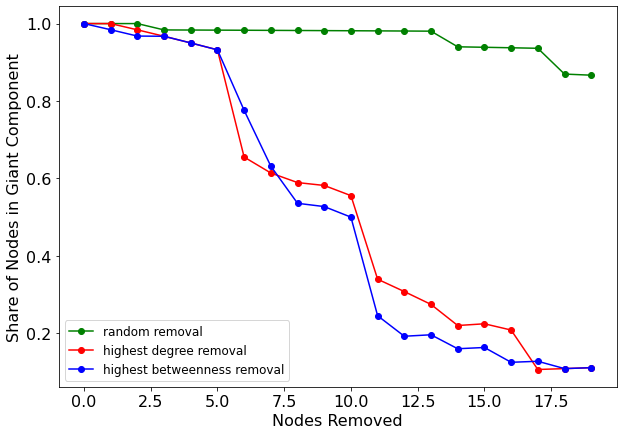

<Figure size 432x288 with 0 Axes>

In [10]:
rep = 20 #num of iterations
share_random = []
G_random_attack = G.copy()
N = G_random_attack.number_of_nodes()
for i in range(rep):
    gc = max(len(c) for c in nx.connected_components(G_random_attack))
    share_random.append(gc/N)
    G_random_attack = random_attack(G_random_attack,1)
    N -= 1 


share_degree = []
G_degree_attack = G.copy()
N = G_degree_attack.number_of_nodes()
for i in range(rep):
    gc = max(len(c) for c in nx.connected_components(G_degree_attack))
    share_degree.append(gc/N)
    G_degree_attack = degree_attack(G_degree_attack,1)
    N -= 1    

share_bc = []
G_bc_attack = G.copy()
N = G_bc_attack.number_of_nodes()
for i in range(rep):
    gc = max(len(c) for c in nx.connected_components(G_bc_attack))
    share_bc.append(gc/N)
    G_bc_attack = bc_attack(G_bc_attack,1)
    N -= 1 

plt.figure(figsize=(10,7))
plt.plot([x for x in share_random],'-o',label='random removal',color='green')
plt.plot([x for x in share_degree],'-o',label='highest degree removal',color='red')
plt.plot([x for x in share_bc],'-o',label='highest betweenness removal',color='blue')
plt.xscale('linear')
plt.ylabel('Share of Nodes in Giant Component',size=16)
plt.xlabel('Nodes Removed',size=16)
plt.legend(prop={'size': 16})
plt.xticks(size=16)
plt.yticks(size=16)

plt.legend(fontsize=12)
plt.show()
plt.savefig("nodeattack_tbn.png")

**A1b):** bc attack is the most efficient because the bc attack has the smallest size of giant component relative to network.

#### c) Reconfiguring the Network (5 pts)

Create ten configuration model networks with the same degree distribution like the train bombing network. For each of these networks, conduct the same attacks (on 20 nodes) with the same three strategies as in b). For each strategy, compute the average shares of nodes in the giant components over all ten graphs after each node deletion, and plot the average shares against the number of deleted nodes. Again, include the curves for all three attack strategies in the same plot and save it into a file **"nodeattack_cm.png"**. Do not remove the lines of your code which create and save your .png file. Which attack is most efficient on average? Would you say that the reconfigured network is more robust toward random and targeted attacks than the original networks? Explain your answers!

_Hint: Like in b) you should **not** call your attack functions with n=20._

In [11]:
# from numpy import *
# d = dict(G.degree())
# for j in range(10):
#     G_cf = nx.configuration_model(d.values(),create_using=nx.Graph)

[0.996875, 0.9968253968253968, 0.9935483870967742, 0.9868852459016393, 0.9866666666666666, 0.9847457627118643, 0.9844827586206897, 0.9789473684210526, 0.975, 0.9727272727272727, 0.9685185185185186, 0.9679245283018869, 0.9711538461538461, 0.9686274509803923, 0.962, 0.9571428571428571, 0.9520833333333332, 0.951063829787234, 0.9456521739130436, 0.9400000000000001]
[0.9984375, 0.9952380952380953, 0.9887096774193548, 0.9786885245901639, 0.9666666666666666, 0.9508474576271186, 0.9379310344827585, 0.9245614035087719, 0.9089285714285715, 0.9, 0.8833333333333334, 0.8641509433962262, 0.8403846153846153, 0.8176470588235294, 0.79, 0.7612244897959184, 0.7249999999999999, 0.6638297872340424, 0.6195652173913044, 0.5533333333333333]
[0.996875, 0.9841269841269842, 0.9725806451612904, 0.9639344262295081, 0.9466666666666667, 0.9372881355932204, 0.9310344827586207, 0.9140350877192983, 0.8928571428571427, 0.8781818181818182, 0.8518518518518517, 0.8283018867924529, 0.8038461538461537, 0.7784313725490197, 0.

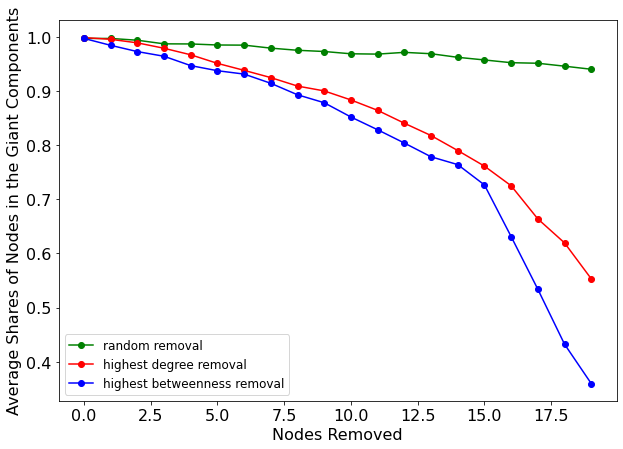

<Figure size 432x288 with 0 Axes>

In [86]:
import statistics
import pandas as pd
# example on how to initialize the configuration model
d = dict(G.degree())
# rep_1 = 2
# rep_2 = 20
# # for i in range(rep_1):
# G_cf = nx.configuration_model(d.values(),create_using=nx.Graph)
# N = G_cf.number_of_nodes()
# for i in range(rep_2):
#     gc = max(len(c) for c in nx.connected_components(G_cf))
#     share_random.append(gc)
#     print(share_random)
#     print('****************************')
#     G_cf = random_attack(G_cf,1)
#     N -= 1 
# print(nx.info(G_cf))

# do random attrack
data_r = pd.DataFrame()
summary_list = []
for i in range(10):
    gc_list=[]
    G_cf = nx.configuration_model(d.values(),create_using=nx.Graph)
    for j in range(20):        
        N = G_cf.number_of_nodes()
        gc = max(len(c) for c in nx.connected_components(G_cf))
        gc_list.extend([gc/N])        
        G_cf_new = random_attack(G_cf,1)
        N -= 1
    summary_list.append(gc_list)
    data_r = pd.DataFrame(summary_list)

avg_r = data_r.mean(0)
avg_CC_random = avg_r.tolist()


# do highest degree attrack
data_d = pd.DataFrame()
summary_list = []
for i in range(10):
    gc_list=[]
    G_cf = nx.configuration_model(d.values(),create_using=nx.Graph)
    for j in range(20):        
        N = G_cf.number_of_nodes()
        gc = max(len(c) for c in nx.connected_components(G_cf))
        gc_list.extend([gc/N])        
        G_cf_new = degree_attack(G_cf,1)
        N -= 1
    summary_list.append(gc_list)
    data_d = pd.DataFrame(summary_list)

avg_d = data_d.mean(0)
avg_CC_degree = avg_d.tolist()


# do highest bc attrack
data_b = pd.DataFrame()
summary_list = []
for i in range(10):
    gc_list=[]
    G_cf = nx.configuration_model(d.values(),create_using=nx.Graph)
    for j in range(20):        
        N = G_cf.number_of_nodes()
        gc = max(len(c) for c in nx.connected_components(G_cf))
        gc_list.extend([gc/N])        
        G_cf_new = bc_attack(G_cf,1)
        N -= 1
    summary_list.append(gc_list)
    data_b = pd.DataFrame(summary_list)

avg_b = data_b.mean(0)
avg_CC_bc = avg_b.tolist()


plt.figure(figsize=(10,7))
plt.plot([x for x in avg_CC_random],'-o',label='random removal',color='green')
plt.plot([x for x in avg_CC_degree],'-o',label='highest degree removal',color='red')
plt.plot([x for x in avg_CC_bc],'-o',label='highest betweenness removal',color='blue')
plt.xscale('linear')
plt.ylabel('Average Shares of Nodes in the Giant Components',size=16)
plt.xlabel('Nodes Removed',size=16)
plt.legend(prop={'size': 16})
plt.xticks(size=16)
plt.yticks(size=16)

plt.legend(fontsize=12)
plt.show()
plt.savefig("nodeattack_cm.png")

**A1c):** _Please provide your answer regarding the robustness here!_

#### d) Attacking Edges (5 pts)

Write two functions which attack an input network by deleting ``n`` edges. The first function should delete random edges, whereas the second function should perform targeted attacks, deleting the ``n`` edges with the highest/lowest value of a specified attribute. Use the function signatures specified in the cells below! 

Make sure that your implementation does not modify the original input network and that it returns the attacked network! Additionally for ``target_edge_attack``, make sure that you always delete only one edge at the same time and that you recalculate the ``attr`` values before deciding on the deletion of the next edge (until you deleted `n` edges).

In [13]:
def random_edge_attack(G: nx.Graph, n: int) -> nx.Graph:
    """
    :param G: networkx graph whose edges we want to attack
    :param n: number of edges which should be attacked/deleted
    :
    :return: resulting networkx graph after deleting n edges
    """
    # your code here
    edges = [i for i in G.edges()]
    x = random.sample(edges,n)
    G.remove_edges_from(x)
    return G

In [14]:
def target_edge_attack(G: nx.Graph, n: int, attr: str, highest: Optional[bool]=True) -> nx.Graph:
    """
    :param G: networkx graph whose edges we want to attack
    :param n: number of edges which should be attacked/deleted
    :         (always one at the same time - recalculate attr values before deleting next edge)
    :param attr: name of the edge attribute whose values we base our attack on
    :param highest: bool indicating whether we want to delete edges with highest or lowest attribute value(s)
    :               Use highest values per default (True)
    :
    :return: resulting networkx graph after deleting n edges
    """
    # your code here
    if highest == True:
        highest_attr_edges = []
        count = 0
        while (count < n): 
            attr_seq = sorted(G.edges(data=True), key=lambda t: t[2].get(attr, 1), reverse=True)
        # sort the edges based on the value of weight
#             print(attr_seq)
        #     print("*******************************************")
            attr_max = (attr_seq[0][0],attr_seq[0][1]) #get the edge with maximum weight value
            highest_attr_edges.extend([attr_max])
#             print(highest_attr_edges)
            count = count + 1
            G.remove_edges_from(highest_attr_edges)
        
    else:
        lowest_attr_edges = []
        count = 0
        while (count < n): 
            attr_seq = sorted(G.edges(data=True), key=lambda t: t[2].get(attr, 1), reverse=False)
#             print(attr_seq)
        # sort the edges based on the value of weight
        #     print(attr_seq)
        #     print("*******************************************")
            attr_min = (attr_seq[0][0],attr_seq[0][1]) #get the edge id with Minimum weight value
            lowest_attr_edges.extend([attr_min])            
            count = count + 1
            G.remove_edges_from(lowest_attr_edges)
#         print(lowest_attr_edges)
    return G

#### e) Deleting Most and Least Bridgy Edges (4 pts)

Use the neighborhood overlap function in the cell below (cf. HA 1) to compute the overlap for each edge in the train bombing network. Create a copy of ``G`` called ``G_overlap``. Add the resulting overlap values as edge attributes with the name ``"overlap"`` to the corresponding edges of ``G_overlap`` (do not modify ``G``). Apply each of the following three attack types on copies of ``G_overlap`` using 1d), where for each attack type you succesively delete 100 edges:

(i) Deleting random edges,  
(ii) Deleting the edge with the highest neighborhood overlap,  
(iii) Deleting the edges with the lowest neighborhood overlap.

For each attack type start with a new (not attacked) copy of the network ``G_overlap``. Store the attacked networks in ``G_overlap_random_attack``, ``G_overlap_highest_attack`` and ``G_overlap_lowest_attack``.

Again, for all attack types, plot the number of removed edges against the share of the giant component in the graph. Include the curves of all three attacks in the same plot and save it into a file **"edgeattack_tbn.png"**. Do not remove the lines of your code which create and save your .png file.
Which attack is the most efficient? Argue why that is the case!

_Hint: The task is to plot the share of the giant component after each edge deletion, so you should **not** call your attack functions with n=100._

In [15]:
def neighborhood_overlap(edge: Tuple[str, str], G: nx.Graph) -> float:
    """
    :param edge: pair of node IDs which indicate the edge we want to compute the node overlap on.
    :param G: networkx graph whose nodes we want to check. You may assume that it is undirected, but weighted
    :
    :return: the node overlap of the given edge as a float 
    """
    node1,node2 = edge[0],edge[1]
    if not G.has_edge(node1,node2):
        return -1
    neighbors_node1 = list(nx.neighbors(G,node1))
    neighbors_node2 = list(nx.neighbors(G,node2))
    intersect = len(set(neighbors_node1).intersection(neighbors_node2))
    
    if intersect == 0:
        return 0
    union = len(set(neighbors_node1).union(neighbors_node2).difference(set([node1,node2])))
    return intersect/union

In [16]:
G_overlap = G.copy()
#add edge attribute 'overlap' to store the overlap value of all edges
for (u,v) in G_overlap.edges:
    overlap = neighborhood_overlap((u,v), G_overlap)
    G_overlap[u][v]['overlap'] = overlap

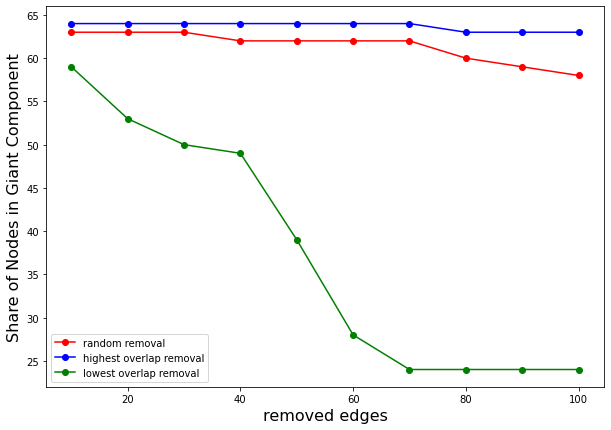

<Figure size 432x288 with 0 Axes>

In [17]:
# do random edges attack to delete 100 random edges
rep = 10 #num of iterations

count = 0
G_overlap_random_attack = G_overlap.copy()
Max_CC_EA_1 = []
removed_edges = 0
num_removed = []
while (count < rep):
    random_edge_attack(G_overlap_random_attack,10) # each iteration detele 10 random edges
    Len_CC_EA_1 = [len(c) for c in sorted(nx.connected_components(G_overlap_random_attack), 
                                          key=len, reverse=True)][0]
    Max_CC_EA_1.append(Len_CC_EA_1)
    count = count + 1
    removed_edges = count*10
    num_removed.extend([removed_edges])  


# do target edges attack to delete 100 highest overlap edges
count = 0
G_overlap_highest_attack = G_overlap.copy()
Max_CC_EA_2 = []
removed_edges = 0
num_removed = []
while (count < rep):
    target_edge_attack(G_overlap_highest_attack,10,'overlap',True) 
    # each iteration detele 10 highest overlap edges
    Len_CC_EA_2 = [len(c) for c in sorted(nx.connected_components(G_overlap_highest_attack), 
                                          key=len, reverse=True)][0]    
    
    Max_CC_EA_2.append(Len_CC_EA_2)
    count = count + 1
    removed_edges = count*10
    num_removed.extend([removed_edges])


# do target edges attack to delete 100 lowest overlap edges
count = 0
G_overlap_lowest_attack = G_overlap.copy()
Min_CC_EA_3 = []
removed_edges = 0
num_removed = []
while (count < rep):
    target_edge_attack(G_overlap_lowest_attack,10,'overlap',False) 
    # each iteration detele 10 lowest overlap edges
    Len_CC_EA_3 = [len(c) for c in sorted(nx.connected_components(G_overlap_lowest_attack), 
                                          key=len, reverse=True)][0]        
    Min_CC_EA_3.append(Len_CC_EA_3)
    count = count + 1
    removed_edges = count*10
    num_removed.extend([removed_edges])

fig = plt.figure(figsize=(10,7))
plt.plot(num_removed, Max_CC_EA_1, '-o',color='red',label='random removal')
plt.plot(num_removed, Max_CC_EA_2, '-o',color='blue',label='highest overlap removal')
plt.plot(num_removed, Min_CC_EA_3, '-o',color='green',label='lowest overlap removal')
plt.xscale('linear')
plt.xlabel('removed edges', fontsize=16)
plt.ylabel('Share of Nodes in Giant Component', fontsize=16)

plt.legend()
plt.show()
plt.savefig("edgeattack_tbn.png")

**A1e):** _Please provide your answer regarding the most efficient edge attack here!_

### Task 2: Homophily and Minorities in Social Networks (35 pts)

In this task we are going to reproduce some of the results on minorities in social networks which have been presented in lecture.

#### a) The Homophilic Preferential Attachment Model (10pts)

Implement the homophilic preferential attachment model that was presented in lecture, using the signature in the cell below. We only consider the simple case in which there are only two groups, which have the same homophilic behavior. Recall that next to the parameters $n$ and $m$ from the standard Barabasi-Albert model, this model also takes a homophily parameter $h$, and a minority size parameter $f_m$.  
The model is initialized with an empty network of $m$ nodes, in which $\lceil f_mm \rceil$ nodes are assigned to the minority, and $\lfloor (1-f_m)m \rfloor$ nodes are assigned to the majority group.  
Whenever a new node is added, we first toss a coin where with probability $f_m$, the new node gets assigned to the minority group, and to the majority group with probability $1-f_m$.  
After a group has been assigned to an arriving node $v_j$, the $m$ nodes $v_i$ to connect to are drawn without replacement from the node-wise probability distribution
$$ \Pi_i = \frac{h_{ij}k_i}{\sum_l h_{lj}k_l}, $$
where $h_{ij} = h$, if nodes $v_i$ and $v_j$ belong to the same group, and  $h_{ij} = 1-h$ otherwise. 
Note that for the first incoming node this distribution is not well-defined yet, so you simply have to connect it to each of the initial $m$ nodes.

In [18]:
def homophilic_pa_model(n: int, m: int, h: float, f_m: float, attr: str) -> nx.Graph:
    """
    :param n: number of nodes
    :param m: number of links to add for each incoming node
    :param h: homophily parameter
    :param f_m: probability that an incoming node belongs to the minority group
    :param attr: string specifying the name of the node attribute which stores the information 
    :            whether a node belongs to the majority or minority group. The value of that attribute should be 0 
    :            if the node belongs to the minority, and 1 otherwise
    :
    :return: resulting networkx graph
    """
    # your code here
    raise NotImplementedError

#### b) Visualizing Homophilic Preferential Attachment (5 pts)

Apply your implementation from a) to create five graphs with $n=100$, $m=3$, $f_m=0.2$, and $h$ varying in $\{0,0.2,0.5,0.8,1\}$. Plot each of these five graphs using a spring layout, where minority nodes are colored red, and majority nodes are colored blue. In addition, draw the nodes in a size that grows proportional to their degree. Save the plots into files **"h0.png"**, **"h02.png"**, **"h05.png"**, **"h08.png"** and **"h1.png"**. Do not remove the lines of your code which create and save your .png files.

#### c) Ranking Bias in Homophilic Networks (10 pts)


Apply your implementation from a) to create five graphs with $n=1000$, $m=5$, $f_m=0.2$, and $h$ varying in $\{0.1,0.3,0.5,0.7,0.9\}$. For each of these graphs, plot the degree distribution of majority and minority nodes against each other. Save the plots into files **"dd01.png"**, **"dd03.png"**, **"dd05.png"**, **"dd07.png"** and **"dd09.png"**.
Additionally, for each of these graphs, rank the nodes by their degree, and compute the fraction of minority nodes in the top $d$% nodes of that ranking for all $d\in\{1,2,3,\dots,100\}$. Plot the curves of $d$ against the fraction of minority nodes of all graphs in the same figure, and save the resulting plot into the file **"fmc.png"**. Do not remove the lines of your code which create and save your .png files. What do you observe?

**A2c):** _Please provide your answer regarding your observations here!_

#### d) Individual Node Perception Bias (4 pts)

Write a function that computes the node-wise perception bias $B_i$ for all nodes of an input graph. For any node $v_i$ with neighbors $N(v_i)$, the value $B_i$ is given by 
$$ B_i = \frac{1}{\hat{f_m}k_i}\sum_{v_j \in N(v_i)} x_j,$$
where $\hat{f_m}$ is the actual fraction of minority nodes in the graph, and $x_j = 1$ if $v_j$ is in the minority group, and $x_j = 0$ otherwise. Use the function signature specified in the cell below:

In [19]:
def perception_bias(G: nx.Graph, attr: str) -> Dict[str, float]:
    """
    :param G: networkx graph on which we want to compute all biases
    :param attr: string specifying the name of the node attribute which stores the information
    :            whether a node belongs to the majority or minority group. The value of that attribute should be 0 
    :            if the node belongs to the minority, and 1 otherwise
    :
    :return: dictionary with node IDs as keys and their respective individual perception bias as value
    """
    # your code here
    raise NotImplementedError

#### e) Perception Bias in Social Networks (6 pts)

Apply your function from d) on the graphs created in c) to compute all node-wise perception values. 
For each of these graphs, compute the average perception bias for nodes in the majority group and minority group. 
Plot the resulting values using a grouped histogram plot. 
This plot should consist of five pairs of bars, where each pair represents the average perception biases of the majority and minority in one of the five graphs. The majority bars should be blue, while the minority bars should be red. Store the plot into a file **"avg_pb.png"**. Do not remove the lines of your code which create and save your .png file.

What do you observe?

**A2e):** _Please provide your answer regarding your observations here!_

### Task 3: Kronecker Graphs (23 pts)

A more recently proposed graph model is built on creating huge graphs out of small base graphs by utilizing the Kronecker matrix product (cf. https://en.wikipedia.org/wiki/Kronecker_product for a definition).
The main idea is to take the adjacency matrix $A$ of a small given _initiator graph_ $G$, and then define the Kronecker power graph $G^k$ as the graph whose adjacency matrix is the $k$-th power of $A$ with respect to the Kronecker product. Thus, for $G^2$, the adjacency matrix would be $ A\otimes A$, for $G^3$ the adjacency matrix would be $A\otimes A \otimes A$, and so on.

In that kind of model, the entries of the adjacency matrix of the base graph can be seen as model parameters out of which (ideally) any kind of large real-world graph can be grown by simply fitting these parameters accordingly.

#### a) Implementing the Kronecker Model (4 pts)

Write a function that takes as input a base graph $G$ and an exponent $k$, and returns the graph $G^k$, using the signature in the cell below. Make sure to also allow for directed graphs as well, i.e., $ G^k$ should be directed if and only if $G$ is directed.  
**Note:** To obtain efficient matrix operations, you may work with ```scipy.sparse```. However, the Kronecker product in ```scipy.sparse``` can introduce zeroes which are explicitly represented in the sparse representation of the resulting matrix. Make sure to eliminate such zeros in time, as ```nx.from_scipy_sparse_matrix``` would create edges with weight 0 from such entries. It is also fine if you only work with ```numpy``` instead of ```scipy.sparse```. 

In [20]:
def kronecker_graph(G: nx.Graph, k: int) -> nx.Graph:
    """
    :param G: initiator graph (networkx graph)
    :param k: Kronecker power to compute
    :
    :return: resulting Kronecker power graph as networkx graph
    """
    # your code here
    raise NotImplementedError

#### b) Growing Two Simple Base Graphs (6 pts)

Consider the following two base graphs specified in the cell below. For each of these two graphs, compute their Kronecker power graphs for $k\in\{2,3,4\}$, and save the resulting graphs into dictionaries `K1_graphs` and `K2_graphs`, where the keys are given by the values of $k$. Further, compute the diameters and densities of these graphs, and save them into dictionaries `K1_diameters`, `K2_diameters`, `K1_densities`, and `K2_densities`, again with using the values of $k$ as key. What do you observe regarding these values?
Finally, compute the degree distributions of both resulting graphs for $k = 4$ and save them into files **"dd_kg1.png"** and **"dd_kg2.png"**. Are the resulting degree distributions likely to occur in real-world graphs? Explain your answers!

In [21]:
K1 = nx.Graph()
K1.add_edges_from([(1,1),(2,2),(3,3),(4,4),(1,2),(2,3),(3,4)])
K2 = nx.Graph()
K2.add_edges_from([(1,1),(2,2),(3,3),(4,4),(1,2),(2,3),(3,4),(2,4)])

In [22]:
K1_graphs = ...
K2_graphs = ...

In [23]:
K1_diameters = ...
K2_diameters = ...
K1_densities = ...
K2_densities = ...

**A3b):** _Please provide your answer regarding your observations here!_

#### c) Stochastic Kronecker Graphs (5 pts)

As the expressive power of Kronecker graphs is somewhat limited in a sense that many real-world degree distributions cannot be achieved through this model, there is also a stochastic variant of the Kronecker model.
In this variant, the input to the model is a matrix $P$, in which the entries are not binary anymore like in an adjacency matrix, but instead can take any value in the interval $[0,1]$. Thus, each entry $P_{ij}$ encodes a probability that an edge is formed between nodes $i$ and $j$.
For a small input matrix $P$, we again grow a bigger matrix by taking its Kronecker powers, and for the final $P^k$we then randomly add edges according to the probabilities in the entries $P^k_{ij}$.

Implement this probabilistic variant of the Kronecker model, using the signature in the cell below. Note that this time you cannot use sparse matrices anymore. Further, for this model we exclusively consider directed networks!

In [24]:
def probabilistic_kronecker(P: np.ndarray, k: int) -> nx.DiGraph:
    """
    :param P: 2D numpy array of edge probabilities to compute the graph from
    :param k: Kronecker power to compute
    :
    :return: resulting Kronecker power graph as a DIRECTED networkx graph
    """
    # your code here
    raise NotImplementedError

#### d) Fitting Kronecker Graphs (8 pts)

We want to apply our implementation from __c)__ to create a graph with $n=1024$ nodes with a desired degree distribution out of a $2\times 2$ base matrix $P$.
Determine  
(i) a base matrix $P_1$ such that the resulting graph has a Poisson degree distribution.  
(ii) a base matrix $P_2$ such that the resulting graph has a power law degree distribution.

Save the corresponding matrices as numpy arrays into variables ```P1``` and ```P2```, and plot the degree distributions (you may use in-degree, out-degree, or their sum) of the resulting graphs for verification in files **"dd_p1.png"** and **"dd_p2.png"**. Make sure to use proper plots for that purpose!

In [25]:
P1 = ...
P2 = ...